In [1]:
import glob
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', None)

### Data import

In [3]:
# Load data
files = glob.glob("Dataset/Data files/data_raw_data00000000000*")
dfs = [pd.read_csv(f) for f in files]
events = pd.concat(dfs,ignore_index=True)
events.head()

,domain_userid,network_userid,domain_sessionid,useragent,os_name,os_family,br_name,br_family,br_version,br_type,derived_tstamp,collector_tstamp,page_urlscheme,page_urlhost,page_urlport,page_urlpath,refr_urlscheme,refr_urlhost,refr_urlport,refr_urlpath,app_id,user_ipaddress,page_view_id,member_id,member_type,article_id,article_type,article_primary_category
0,4c787d9b-def2-48df-8175-0194a70d4d2e,10126034-d193-40f9-8d43-08eeb4fa1c55,f9918862-c713-4be9-9aa2-6669ed8e97a0,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_5_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/278.0.0.38.115;FBBV/229103054;FBDV/iPhone11,2;FBMD/iPhone;FBSN/iOS;FBSV/13.5.1;FBSS/3;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/233116984]",Mac OS X (iPhone),iOS,Apple WebKit,Apple WebKit,NaN,Browser,2020-09-02 05:31:32.623 UTC,2020-09-02 05:31:32.631 UTC,https,subscribe.smh.com.au,80,/,https,www.facebook.com,80.0,/,smh-web,lHArjWn1sYOQukFaQFJbFQotZwlCt2PLD3GPmptn4g4=,A1CF875B-3A58-40D2-9B3B-6C4C230300BE,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,NaN,BUNDLES,NaN
1,069128fe-9b68-4add-aa40-a80b25296c0f,69214b7c-61cf-499e-b106-79ba83cd6e69,1c40bf63-c772-48f3-afee-d610de9c2197,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/284.0.0.53.102;FBBV/239566903;FBDV/iPhone11,8;FBMD/iPhone;FBSN/iOS;FBSV/13.6.1;FBSS/2;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/241187076]",Mac OS X (iPhone),iOS,Apple WebKit,Apple WebKit,NaN,Browser,2020-09-02 07:02:05.672 UTC,2020-09-02 07:02:05.678 UTC,https,subscribe.smh.com.au,80,/,https,www.facebook.com,80.0,/,smh-web,Ko5v+2V6wwo4avp/6tCb96GInTiirs7G+ZtIDK0AiS8=,8566CD91-47DD-4ABD-A985-876DB9A2DB11,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,NaN,BUNDLES,NaN
2,54d88719-c586-4e17-a10d-d55d40aa8ec7,0cf831c9-e2f7-4554-a084-d0080c597130,4a6b3c4e-742c-42b4-82c4-7eb44c57d18f,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/285.0.0.58.116;FBBV/241286868;FBDV/iPhone10,1;FBMD/iPhone;FBSN/iOS;FBSV/13.6.1;FBSS/2;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/242232675]",Mac OS X (iPhone),iOS,Apple WebKit,Apple WebKit,NaN,Browser,2020-09-02 09:34:26.496 UTC,2020-09-02 09:34:26.497 UTC,https,www.smh.com.au,80,/national/covid-19-data-centre-coronavirus-by-the-numbers-20200401-p54g4w.html,http,l.facebook.com,80.0,/l.php,smh-web,HyR7dH9fWnHIti4IhqcoT+vfYUVngUudtiXjtDAZEcw=,8CD988BA-A702-4954-AEA5-AD356A8B08DB,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,P54G4W,BESPOKE,CORONAVIRUS PANDEMIC
3,22d45b46-8f1d-4323-a9fe-c4fb64f3a9b1,af414736-ef29-46ec-b793-3211a6febd35,490ab8b1-dd7e-4295-adbb-7dbcc11fa230,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/285.0.0.58.116;FBBV/241286868;FBDV/iPhone10,3;FBMD/iPhone;FBSN/iOS;FBSV/13.6.1;FBSS/3;FBID/phone;FBLC/en_GB;FBOP/5;FBRV/242176790]",Mac OS X (iPhone),iOS,Apple WebKit,Apple WebKit,NaN,Browser,2020-09-02 06:57:58.248 UTC,2020-09-02 06:57:58.594 UTC,https,www.smh.com.au,80,/,http,l.facebook.com,80.0,/l.php,smh-web,8oVjt+1jHJfCWcNLt1x0m3/OR8KO3t6Qdo84CywfvJk=,92A1022F-6F13-41F6-91CE-DC3EFC9F5BD3,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,NaN,HOMEPAGE,NaN
4,5cc4c8de-9764-497a-9c6d-e88a9f2f8314,3a3acdf8-d833-4e54-88b5-83c7c2820e35,5317512c-f741-4671-8c9d-156aff3ef779,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 [FBAN/FBIOS;FBAV/269.0.0.65.121;FBBV/212944159;FBDV/iPhone11,8;FBMD/iPhone;FBSN/iOS;FBSV/13.6;FBSS/2;FBID/phone;FBLC/en_Qaau_GB;FBOP/5;FBRV/215437040]",Mac OS X (iPhone),iOS,Apple WebKit,Apple WebKit,NaN,Browser,2020-09-02 05:32:06.778 UTC,2020-09-02 05:32:06.785 UTC,https,subscribe.smh.com.au,80,/,https,www.facebook.com,80.0,/,smh-web,CeSRXwk1Xx7Yg8k+wv++FTw4E/oRMfZxhJ0/PVCH3sU=,D58D994C-C9D1-4FBD-9B8A-64EA4BE951B2,0AAQhPrQmHuvKC08RFgkT68fGVirRQfh

### Looking at the data
Below shows a selection of data discovery tasks

In [4]:
events.shape

(3659406, 28)

In [5]:
# Columns with NaN values
print(events.isnull().sum())

domain_userid                     0
network_userid                   28
domain_sessionid                  0
useragent                         0
os_name                           0
os_family                         0
br_name                           0
br_family                         0
br_version                   251308
br_type                           0
derived_tstamp                    0
collector_tstamp                  0
page_urlscheme                    0
page_urlhost                      0
page_urlport                      0
page_urlpath                      0
refr_urlscheme              1322786
refr_urlhost                1322817
refr_urlport                1322785
refr_urlpath                1434924
app_id                            0
user_ipaddress                    0
page_view_id                   1520
member_id                         0
member_type                       0
article_id                  2253631
article_type                   4150
article_primary_category    

In [6]:
# Look at the frequency distribution of categories within a feature
print(events['article_type'].value_counts())

HOMEPAGE                2022018
ARTICLE                 1130366
INDEX                    222799
LIVE ARTICLE             192771
VIDEO                     31698
FEATUREARTICLE            30084
BESPOKE                   10057
BUNDLES                    2750
SEARCH                     2447
PUZZLE                     2130
ERROR                      1626
PHOTOGALLERY               1419
LOGIN                      1096
SUBSCRIPTION                791
SUBSCRIPTIONS               564
CONCIERGE                   510
PROFILE DETAILS             458
SUBSCRIPTION DETAILS        350
SUBSCRIPTION FUNNEL         327
BILLING INFORMATION         229
SIGNUPS                     198
PAYMENT METHOD              193
LOGIN DETAILS               173
NEWSLETTERS                  87
CONTACT METHOD               57
CHANGE PACKAGE               39
SMH BUNDLES                  14
SOUNDSLIDE                    5
Name: article_type, dtype: int64


Looked at events with a null article_type - they seem to mostly be things like interactive pages, support center overview or signup pages. It could be useful to add article types so these could be easier tracked if required.

In [7]:
noarttype = events.loc[events['article_type'].isnull()]
noarttype['page_urlpath'].unique()

array(['/interactive/2020/coronavirus/what-is-within-5km-radius/index.html',
       '/signup_newsletter/40', '/',
       '/channel/zHE9EWDHf1XPuz3Phk0YIg/members/signups/confirmation',
       '/support-centre/subscription-benefits/',
       '//faqs/can-access-todays-paper/', '/signup_newsletter',
       '/support-centre/overview/', '/faqs/can-access-todays-paper/',
       '/support-centre/newspaper-deliveries/', '/read-todays-paper/',
       '/support-centre/manage-billing-and-accounts/', '/app.html',
       '/support-centre/todays-paper/',
       '/events-offers/spend-thursdays-palace-cinemas/',
       '/subscription-features/',
       '/faqs/newspaper-wasnt-delivered-today-3/',
       '/signup_newsletter/10108', '/events-offers/', '/delivery-update/',
       '/members/sessions/applenews/gigya_create',
       '/signup_newsletter/10103', '/app',
       '/faqs/going-away-temporarily-suspend-newspaper-delivery/',
       '/members/sessions/applenews/new',
       '/interactive/2020/coronav

In [8]:
# Look at browser family type
print(events['br_family'].value_counts())

Chrome               1957694
Safari               1138339
Firefox               235939
Robot/Spider          144163
Apple WebKit           75972
Internet Explorer      65827
Microsoft Edge         34900
Unknown                 3792
Opera                   1419
Mozilla                 1186
Vivaldi                  129
Konqueror                 35
Thunderbird                6
SeaMonkey                  4
CFNetwork                  1
Name: br_family, dtype: int64


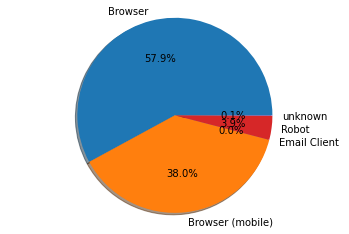

In [9]:
# Take a look at the ratio of events that classify themselves as bots
labels = events['br_type'].astype('category').cat.categories.tolist()
counts = events['br_type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

Remove duplicate events:

In [10]:
# Find completely duplicate records
duplicateevents = events[events.duplicated()]

In [11]:
duplicateevents.shape

(259, 28)

In [12]:
# Remove duplicate events from data set
events.drop_duplicates(keep='first', inplace=True)
events.shape

(3659147, 28)

#### Create a new column to hold user type
Here I will save discovered information about bots, proxies, impossible users etc

In [13]:
# Create a new column to hold user type
events['user_type'] = np.nan

### Finding bots

#### Known bots
First we look for bots that declare themselves as such.

The browser name and family would be set to Robot/Spider and browser_type Robot. Alternatively the bot name may included in the useragent so I searched here for bot, spider and crawl to catch any with these strings in the useragent.

In [14]:
# Search for declared bots as well as those with bot, crawl or spider in the useragent
mask = (events['br_name'] == 'Robot/Spider') | (events['br_family'] == 'Robot/Spider') | (events['br_type'] == 'Robot') | (events['useragent'].str.contains("bot|spider|crawl"))
events.loc[mask, 'user_type'] = 'Bot'
events['user_type'].value_counts()

Bot    146306
Name: user_type, dtype: int64

#### Compare with a database or list of known crawler user agents
Here I use a list from https://github.com/monperrus/crawler-user-agents and assign not yet identified events with these user agents as probable bots

In [15]:
# Load crawler-user-agents dataset
useragents = pd.read_json("Dataset/Data files/crawler-user-agents.json")
useragents.shape

(516, 6)

In [16]:
# This takes a few minutes to run so would be worth looking for a more efficient method
#mask = ((events['useragent'].str.contains('|'.join(useragents['pattern']), case=False)) & (events['user_type'] != 'Bot'))
#events.loc[mask, 'user_type'] = 'Probable bot'
# This is faster:
import re
pat = '|'.join(map(re.escape, useragents['pattern']))
mask = ((events['useragent'].str.contains(pat)) & (events['user_type'] != 'Bot'))
events.loc[mask, 'user_type'] = 'Probable bot'

In [17]:
events['user_type'].value_counts()

Bot             146306
Probable bot     15644
Name: user_type, dtype: int64

#### Similar bot behaviour
I also flagged events with a similar pattern to the known bots as being Probable bots, after finding that they were also bots or had suspicious user-agent strings that did not match known ones. None of them were Subscribers.

This pattern was:

- having null (NaN) values in 'refr_urlscheme', 'refr_urlhost', 'refr_urlport' and 'refr_urlpath'

and

- having Unknown 'os_name', 'os_family' and 'br_version's

This found some more events that had not already been flagged as known or Probable bots.

In [18]:
# Flag non bots that have similar pattern to known bots
mask = ((events['refr_urlscheme'].isnull()) & (events['refr_urlhost'].isnull()) & (events['refr_urlport'].isnull()) & (events['refr_urlpath'].isnull()) & (events['user_type'] != "Bot") & (events['user_type'] != "Probable bot") & (events['os_name'] == 'Unknown') & (events['os_family'] == 'Unknown') & (events['br_version'].isnull()))
events.loc[mask, 'user_type'] = 'Probable bot'
events['user_type'].value_counts()

Bot             146306
Probable bot     16875
Name: user_type, dtype: int64

Flag as potential bots events with the same cookie (domain_userid) as already identified bots

In [19]:
bots = events.loc[(events['user_type'] == 'Bot') | (events['user_type'] == 'Probable bot')]
events.loc[(events.domain_userid.isin(bots['domain_userid']) & (events['user_type'] != "Bot") & (events['user_type'] != "Probable bot")), 'user_type'] = "Probable bot"
events['user_type'].value_counts()

Bot             146306
Probable bot     16917
Name: user_type, dtype: int64

I did a check and this already caught events with the same session ids and IP addresses as known bots. Then I checked if any of these were subscribers.

In [20]:
# Check if any are subscribers
subbot = events.loc[((events['user_type'] == 'Probable bot') | (events['user_type'] == 'Bot')) & (events['member_type'] == 'Subscriber')]
subbot.shape

(3, 29)

In [21]:
subbot

,domain_userid,network_userid,domain_sessionid,useragent,os_name,os_family,br_name,br_family,br_version,br_type,derived_tstamp,collector_tstamp,page_urlscheme,page_urlhost,page_urlport,page_urlpath,refr_urlscheme,refr_urlhost,refr_urlport,refr_urlpath,app_id,user_ipaddress,page_view_id,member_id,member_type,article_id,article_type,article_primary_category,user_type
788456,1508e11c-a9f0-4693-b690-7f51e0977ca7,415d9eba-5859-48d5-a40c-015f77dd3305,2765bb7a-a9ea-4498-ab5b-ffba0d4f7f13,"[FBAN/FBIOS;FBDV/iPhone10,3;FBMD/iPhone;FBSN/iOS;FBSV/13.6.1;FBSS/3;FBID/phone;FBLC/en_GB;FBOP/5]",Unknown,Unknown,Unknown,Unknown,NaN,unknown,2020-09-01 21:39:00.031 UTC,2020-09-01 21:39:00.181 UTC,https,www.smh.com.au,80,/world/europe/unaccountable-experts-tony-abbott-calls-for-end-to-lockdowns-travel-bans-20200901-p55rh9.html,NaN,NaN,NaN,NaN,smh-web,iL5SOq3SB0ADQ/N/4vg40+po53TPYjG2tyC291Ov28c=,E4CF0AFE-430D-4298-BD98-72F4A8380FED,J27VPyWaPPfnkG02GKNvP0ZQLH1y6F9LAniaO3gy2m4=,Subscriber,P55RH9,ARTICLE,CORONAVIRUS PANDEMIC,Probable bot
793336,2c7e94f9-e5d1-42f9-81f6-5405a947045d,22edc463-f297-457d-81ec-2cadea0fda25,fbd31f7f-c410-4f04-bf8a-89d75b6c985d,"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/80.0.3987.0 Safari/537.36",Linux,Linux,Chrome 8,Chrome,80.0.3987.0,Browser,2020-09-02 20:57:26.807 UTC,2020-09-02 20:57:26.81 UTC,https,www.smh.com.au,80,/puzzles/crosswords/cryptic/2020-09-03,NaN,NaN,NaN,NaN,smh-web,SGCGqfCJm4g3s9fVS+ozsmFV/kEb+VL6guCxdP4ngws=,7BD61AC2-1D84-4FEE-806E-D1E3A85003F4,w/j/iNzUXsYb75Hm1hSi3uQZ87fIoYpYfhMnWMEDzqQ=,Subscriber,NaN,PUZZLE,NaN,Probable bot
1845425,54530d1e-4753-4a75-8189-139ee6acfd9f,0b131541-8096-45b1-b490-3116ead2046d,cbb2df10-73be-4082-8f09-0cfa7b73ac9f,"Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) HeadlessChrome/80.0.3987.0 Safari/537.36",Linux,Linux,Chrome 8,Chrome,80.0.3987.0,Browser,2020-09-01 20:54:43.204 UTC,2020-09-01 20:54:43.207 UTC,https,www.smh.com.au,80,/todays-newspaper,https,www.smh.com.au,80.0,/,smh-web,SGCGqfCJm4g3s9fVS+ozsmFV/kEb+VL6guCxdP4ngws=,10E000BF-024A-4D32-946B-CBEB44B589C2,w/j/iNzUXsYb75Hm1hSi3uQZ87fIoYpYfhMnWMEDzqQ=,Subscriber,NaN,INDEX,NaN,Probable bot


Investigate these and remove from bot list if legitimate

#### Events per session - further bot discovery
Look at how many events there are per session to discover other bot behaviour (such as repeated regular access to the homepage over long periods of time or many rapid hits, which could indicate a DDoS (denial of service) attack)

Compare typical session behaviour of bots with subscribers

In [22]:
botsessions = bots['collector_tstamp'].groupby(bots['domain_sessionid']).count()
botsessions.describe()

count     46776.000000
mean          3.488563
std         505.153847
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max      109254.000000
Name: collector_tstamp, dtype: float64

The session id with the most events and multiple IP addresses was used by various Google bots - these have already all been classified as either user_type Bot or Probable bot.

In [23]:
subscribers = events.loc[events['member_type'] == 'Subscriber']
subsessions = subscribers['collector_tstamp'].groupby(subscribers['domain_sessionid']).count()
subsessions.describe()

count    490834.000000
mean          2.119886
std           3.846238
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max         970.000000
Name: collector_tstamp, dtype: float64

This shows that a small number of sessions have a very high number of hits to the site compared to a normal subscriber. Let's look at non-bot non-subscribers and see if we can identify any with similarly high site hits.

In [24]:
nonsubsnonbots = events.loc[(events['member_type'] != 'Subscriber') & (events['user_type'] != 'Bot') & (events['user_type'] != 'Probable bot')]
nonsubsessions = nonsubsnonbots['collector_tstamp'].groupby(nonsubsnonbots['domain_sessionid']).count()
nonsubsessions.describe()

count    1.597375e+06
mean     1.537156e+00
std      3.075318e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      1.000000e+00
max      5.630000e+02
Name: collector_tstamp, dtype: float64

Look at a sample of the highest number of events

In [25]:
highhitnonsubsessions = nonsubsnonbots[['collector_tstamp']].groupby(nonsubsnonbots['domain_sessionid']).count()
highhits = highhitnonsubsessions.loc[highhitnonsubsessions['collector_tstamp']>300]

In [26]:
highhits

,collector_tstamp
domain_sessionid,
6b3e914d-b86c-4ac6-ae5f-c97be60cc18b,508
77c5fb45-adde-4a75-b6ea-ac0ca266c885,318
93fd4118-f66f-40bc-9aad-908849def142,562
cd7ab107-9222-4827-8cfc-a57010bfb3d1,563
eda3d97f-35f0-44de-91c6-3af28c7336d6,309


In [27]:
manyeventsessions = events.loc[events['domain_sessionid'].isin(highhits.index)]
manyeventsessions['article_type'].value_counts()

HOMEPAGE    2260
Name: article_type, dtype: int64

Most of these events are accessing the homepage.

In [28]:
user = events.loc[events['domain_sessionid'] == '77c5fb45-adde-4a75-b6ea-ac0ca266c885']
nsessiontimestamps = user['collector_tstamp'].unique()
sorted(nsessiontimestamps)

['2020-09-01 00:34:20.698 UTC',
 '2020-09-01 00:38:49.812 UTC',
 '2020-09-01 00:47:24.487 UTC',
 '2020-09-01 00:56:05.144 UTC',
 '2020-09-01 01:35:13.363 UTC',
 '2020-09-01 01:39:35.491 UTC',
 '2020-09-01 01:48:15.046 UTC',
 '2020-09-01 01:52:36.143 UTC',
 '2020-09-01 02:27:20.63 UTC',
 '2020-09-01 02:31:41.42 UTC',
 '2020-09-01 02:36:04.786 UTC',
 '2020-09-01 02:49:04.031 UTC',
 '2020-09-01 03:32:30.708 UTC',
 '2020-09-01 03:49:52.858 UTC',
 '2020-09-01 03:58:34.857 UTC',
 '2020-09-01 04:11:41.161 UTC',
 '2020-09-01 04:20:18.133 UTC',
 '2020-09-01 04:37:40.271 UTC',
 '2020-09-01 04:41:59.09 UTC',
 '2020-09-01 04:50:39.504 UTC',
 '2020-09-01 05:04:02.433 UTC',
 '2020-09-01 05:12:44.437 UTC',
 '2020-09-01 05:34:26.902 UTC',
 '2020-09-01 05:38:48.959 UTC',
 '2020-09-01 05:43:09.547 UTC',
 '2020-09-01 05:47:28.666 UTC',
 '2020-09-01 06:04:51.775 UTC',
 '2020-09-01 06:22:14.158 UTC',
 '2020-09-01 06:35:15.69 UTC',
 '2020-09-01 06:43:56.799 UTC',
 '2020-09-01 06:52:39.391 UTC',
 '2020-09-01

Sessions with hundreds of events over this period are suspicious. They are accessing the site regularly throughout the day and night and not as a typical user would. Flag these as probable bots.
I have set the threshold to 300 for now, however it would be good to further investigate events numbers per session to get the numbers more accurate.

In [29]:
events.loc[events['domain_sessionid'].isin(manyeventsessions['domain_sessionid']), 'user_type'] = 'Probable bot'
events['user_type'].value_counts()

Bot             146306
Probable bot     19177
Name: user_type, dtype: int64

Do the same for subscribers

In [30]:
highhitsubsessions = subscribers[['collector_tstamp']].groupby(subscribers['domain_sessionid']).count()
highhitsubs = highhitsubsessions.loc[highhitsubsessions['collector_tstamp']>300]
events.loc[events['domain_sessionid'].isin(highhitsubs.index), 'user_type'] = 'Probable bot (Subscriber)'
events['user_type'].value_counts()

Bot                          146306
Probable bot                  19177
Probable bot (Subscriber)       970
Name: user_type, dtype: int64

In [31]:
subbot = events.loc[events['user_type'] == 'Probable bot (Subscriber)']
subbot['article_type'].value_counts()

HOMEPAGE    968
ARTICLE       2
Name: article_type, dtype: int64

In [32]:
subbot['member_id'].value_counts()

qm8XQOUk8I/hsXKF3lq52nu+K7wgL4BJUvMAs9QwgFg=    970
Name: member_id, dtype: int64

These are all one member so it looks like this member's account has been compromised.

In [33]:
ssessiontimestamps = subbot['collector_tstamp'].unique()
sorted(ssessiontimestamps)

['2020-09-01 05:03:22.726 UTC',
 '2020-09-01 05:10:15.106 UTC',
 '2020-09-01 05:14:28.617 UTC',
 '2020-09-01 05:19:32.782 UTC',
 '2020-09-01 05:24:30.379 UTC',
 '2020-09-01 05:29:39.097 UTC',
 '2020-09-01 05:34:23.895 UTC',
 '2020-09-01 06:09:48.161 UTC',
 '2020-09-01 06:25:11.712 UTC',
 '2020-09-01 06:35:37.004 UTC',
 '2020-09-01 06:35:37.093 UTC',
 '2020-09-01 06:45:29.297 UTC',
 '2020-09-01 06:50:18.078 UTC',
 '2020-09-01 06:50:55.131 UTC',
 '2020-09-01 07:10:56.031 UTC',
 '2020-09-01 07:11:05.422 UTC',
 '2020-09-01 07:11:10.534 UTC',
 '2020-09-01 07:11:13.503 UTC',
 '2020-09-01 07:11:28.681 UTC',
 '2020-09-01 07:24:21.831 UTC',
 '2020-09-01 07:39:05.324 UTC',
 '2020-09-01 07:39:06.304 UTC',
 '2020-09-01 07:59:14.866 UTC',
 '2020-09-01 08:14:23.029 UTC',
 '2020-09-01 08:39:36.084 UTC',
 '2020-09-01 08:54:41.823 UTC',
 '2020-09-01 09:00:00.701 UTC',
 '2020-09-01 09:09:45.981 UTC',
 '2020-09-01 09:24:59.995 UTC',
 '2020-09-01 10:00:26.302 UTC',
 '2020-09-01 10:05:06.975 UTC',
 '2020-0

#### Looking at session expiry

Now looking at the timing between a session's event timestamps. If there are gaps greater than 30 minutes or timestamps on different days, these would be suspicious.

    Pseudocode:

    for each non-bot session:

        sort timestamps
    
        for each timestamp compare with next:
    
            if (diff between consecutive timestamps > 30 minutes) or (a different day):
        
                set user_type to 'Probable bot'

In [34]:
# Create a sorted dataframe by session id and timestamp
sorteddf = events.sort_values(by=['domain_sessionid', 'collector_tstamp'])

In [35]:
# Create a new column to hold the previous session id 
sorteddf['previous_sessionid'] = sorteddf['domain_sessionid'].shift(1)

In [36]:
# If the session id is the same as the previous one, then save the timestamp of the previous session
sorteddf['previous_timestamp'] = sorteddf['collector_tstamp'].shift(1)[(sorteddf['previous_sessionid'].notnull()) & (sorteddf['previous_sessionid'] == sorteddf['domain_sessionid'])]

In [37]:
# convert the timestamps for comparison
sorteddf['previous_timestamp'] = pd.to_datetime(sorteddf['previous_timestamp'])
sorteddf['collector_tstamp'] = pd.to_datetime(sorteddf['collector_tstamp'])

In [38]:
# Create a new column to hold the time difference
sorteddf['diff'] = np.nan

In [39]:
# If there is a previous session event and it is not a different day,
# then set column 'diff' value to the time from the previous event in minutes
sorteddf.loc[(sorteddf['previous_timestamp']!= np.datetime64('NaT')) & ((sorteddf['collector_tstamp'] - sorteddf['previous_timestamp']).dt.days<1), 'diff'] = (sorteddf['collector_tstamp'] - sorteddf['previous_timestamp']).dt.total_seconds() / 60

In [40]:
# If there is a previous session event and it IS a different day,
# then set column 'diff' value to 999
sorteddf.loc[(sorteddf['previous_timestamp']!= np.datetime64('NaT')) & ((sorteddf['collector_tstamp'] - sorteddf['previous_timestamp']).dt.days >= 1), 'diff'] = 999

In [41]:
sorteddf.head()

,domain_userid,network_userid,domain_sessionid,useragent,os_name,os_family,br_name,br_family,br_version,br_type,derived_tstamp,collector_tstamp,page_urlscheme,page_urlhost,page_urlport,page_urlpath,refr_urlscheme,refr_urlhost,refr_urlport,refr_urlpath,app_id,user_ipaddress,page_view_id,member_id,member_type,article_id,article_type,article_primary_category,user_type,previous_sessionid,previous_timestamp,diff
3497790,d7b744a8-b70a-4efb-8d06-c80abed2be84,e0c344bc-08f5-4b8d-aec2-3cef9fa5e286,00000a61-d64e-4d93-8b37-5f95d319b953,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36",Mac OS X,Mac OS X,Chrome 8,Chrome,84.0.4147.105,Browser,2020-09-01 03:05:47.42 UTC,2020-09-01 03:05:47.422000+00:00,https,www.smh.com.au,80,/business/markets/asx-to-slide-big-night-for-apple-tesla-rba-decision-looms-20200901-p55r59.html,https,www.smh.com.au,80.0,/,smh-web,LjQxW8m2x/4tSEHsdp7PUTqcL9+HhwaKZaCYAf0maxQ=,B5D9F3BA-B041-4792-BF68-93F6AD99CF29,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,P55R59,LIVE ARTICLE,MARKETS LIVE,NaN,NaN,NaT,NaN
2765583,d7b744a8-b70a-4efb-8d06-c80abed2be84,1af7f306-3f3f-4d7a-b8aa-70734ba83d58,00000a61-d64e-4d93-8b37-5f95d319b953,"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_13_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.105 Safari/537.36",Mac OS X,Mac OS X,Chrome 8,Chrome,84.0.4147.105,Browser,2020-09-01 03:08:13.195 UTC,2020-09-01 03:08:13.336000+00:00,https,www.smh.com.au,80,/business/markets/asx-to-slide-big-night-for-apple-tesla-rba-decision-looms-20200901-p55r59.html,https,www.smh.com.au,80.0,/business/markets/asx-to-slide-big-night-for-apple-tesla-rba-decision-looms-20200901-p55r59.html,smh-web,LjQxW8m2x/4tSEHsdp7PUTqcL9+HhwaKZaCYAf0maxQ=,6CB42FDE-8494-440D-A3AA-C4E554921631,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,P55R59,LIVE ARTICLE,MARKETS LIVE,NaN,00000a61-d64e-4d93-8b37-5f95d319b953,2020-09-01 03:05:47.422000+00:00,2.431900
1851729,52333e33-36bf-406d-88b8-1735c9ee9fc6,fa9b060c-b5df-4edc-96fa-0410c23b1aee,00000aae-2854-4dcb-a45d-8808130b9cbf,"Mozilla/5.0 (Macintosh; Intel Mac OS X 11_0) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.0 Safari/605.1.15",Mac OS X,Mac OS X,Safari,Safari,14.0,Browser,2020-09-01 02:33:37.486 UTC,2020-09-01 02:33:37.488000+00:00,https,www.smh.com.au,80,/world/oceania/returning-kiwis-account-for-bulk-of-new-cases-20200901-p55r9p.html,https,www.smh.com.au,80.0,/coronavirus-pandemic,smh-web,yDC4S1HsWEYbDG2heQVwT/QtRI767JHuAiK7Vfs05+4=,C2D0FE2A-06AA-4440-8A1F-CFF048A121B6,uQXHT83n4eAmNYgkYsutNY1avKqury/oJBypEDf0Ga8=,Non-Subscriber,P55R9P,ARTICLE,CORONAVIRUS PANDEMIC,NaN,00000a61-d64e-4d93-8b37-5f95d319b953,NaT,NaN
706344,4aacaec6-267e-4d06-b6f6-169328263718,902d74b1-b5ef-4476-80ef-74b655db0b58,00000ddc-144b-4d97-87dc-79f8c21d0c8f,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/84.0.4147.122 Mobile/15E148 Safari/604.1",Mac OS X (iPhone),iOS,Chrome Mobile,Chrome,84.0.4147.122,Browser (mobile),2020-09-03 21:44:09.507 UTC,2020-09-03 21:44:09.511000+00:00,https,www.smh.com.au,80,/,https,www.smh.com.au,80.0,/,smh-web,LazDn3F8h4zDIa3VLWNsfpM686smQdmhpyF3+v2OeWc=,2CD53423-3DF8-4127-8E3E-A437A3D5BDBF,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,NaN,HOMEPAGE,NaN,NaN,00000aae-2854-4dcb-a45d-8808130b9cbf,NaT,NaN
705109,4aacaec6-267e-4d06-b6f6-169328263718,902d74b1-b5ef-4476-80ef-74b655db0b58,00000ddc-144b-4d97-87dc-79f8c21d0c8f,"Mozilla/5.0 (iPhone; CPU iPhone OS 13_6 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) CriOS/84.0.4147.122 Mobile/15E148 Safari/604.1",Mac OS X (iPhone),iOS,Chrome Mobile,Chrome,84.0.4147.122,Browser (mobile),2020-09-03 22:14:13.681 UTC,2020-09-03 22:14:13.694000+00:00,https,www.smh.com.au,80,/,https,www.smh.com.au,80.0,/,smh-web,LazDn3F8h4zDIa3VLWNsfpM686smQdmhpyF3+v2OeWc=,533B365C-E21A-4A5A-8493-402C6EA5C97F,0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=,Non-Subscriber,NaN,HOMEPAG

In [42]:
sorteddf['diff'].unique()

array([        nan,  2.4319    , 30.06971667, ...,  7.91348333,
        8.29351667, 63.60996667])

In [43]:
sorteddf['domain_sessionid'].loc[sorteddf['diff']==999].count()

588

In [44]:
sorteddf['domain_sessionid'].loc[sorteddf['diff'].isnull()].count()

2129093

In [45]:
sorteddf['domain_sessionid'].loc[sorteddf['diff'] > 35].count()

73655

In [46]:
# collect all the non null diffs that are over 30 minutes
# I have set the threshold as 35 in case of timestamp errors - need to find out under what circumstances it is still considered a valid session
sortedexpsess = sorteddf.loc[(sorteddf['diff'].notnull()) & (sorteddf['diff'] > 35)]

In [47]:
events['user_type'].value_counts()

Bot                          146306
Probable bot                  19177
Probable bot (Subscriber)       970
Name: user_type, dtype: int64

In [48]:
# Now find and flag all that have 'diff' of over 30 minutes - these should not have the same session ids
# where diff is not null and diff > 30 and is not a bot or probable bot and is not a subscriber
events.loc[(events.index.isin(sortedexpsess.index)) & (events['user_type'] != "Bot") & (events['user_type'] != "Probable bot") & (events['member_type'] != 'Subscriber'), 'user_type'] = "Non-Subscriber (non-expd Session)"
events['user_type'].value_counts()

Bot                                  146306
Non-Subscriber (non-expd Session)     46170
Probable bot                          19177
Probable bot (Subscriber)               970
Name: user_type, dtype: int64

In [49]:
# Flag Subscribers with session IDs that have for some reason not expired as: Subscriber (non-expd Session)
# where diff is not null and diff > 30 and is not a bot or probable bot and is a subscriber
events.loc[(events.index.isin(sortedexpsess.index)) & (events['user_type'] != "Bot") & (events['user_type'] != "Probable bot") & (events['member_type'] == 'Subscriber'), 'user_type'] = 'Subscriber (non-expd Session)'
events['user_type'].value_counts()

Bot                                  146306
Non-Subscriber (non-expd Session)     46170
Subscriber (non-expd Session)         27337
Probable bot                          19177
Probable bot (Subscriber)               966
Name: user_type, dtype: int64

I also tried the above code using derived_tstamp and got less flagged events (42581 Non-Subcribers and 25687 Subscribers compared to 46170 Non-Subcribers and 27337 Subscribers) but the numbers are still high.

Look at some of the flagged subscribers

In [50]:
subsess = events.loc[events['user_type'] == 'Subscriber (non-expd Session)']
subsess.head()

,domain_userid,network_userid,domain_sessionid,useragent,os_name,os_family,br_name,br_family,br_version,br_type,derived_tstamp,collector_tstamp,page_urlscheme,page_urlhost,page_urlport,page_urlpath,refr_urlscheme,refr_urlhost,refr_urlport,refr_urlpath,app_id,user_ipaddress,page_view_id,member_id,member_type,article_id,article_type,article_primary_category,user_type
1505,a8dc0854-b90f-411b-a546-a63cf3b4f1f0,8de29f5d-7725-4377-942f-7cb761d581f8,56f9aca8-094d-45ee-8fd6-768c9de3fbbd,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:79.0) Gecko/20100101 Firefox/79.0,Windows 10,Windows,Firefox 7,Firefox,79.0,Browser,2020-09-02 22:05:48.443 UTC,2020-09-03 06:00:01.244 UTC,https,www.smh.com.au,80,/,https,www.thesmhinsider.com.au,80.0,/s/Respond/bb81b94f-4328-41bd-8cf0-544c9828eafa,smh-web,nPv7ssdG66AFUvhsftA7ABQQhOx86LtOr+Cn6Q12tJE=,59FD215D-0062-4A75-ADC0-C23598FE0416,cmSh12eRMh0AFbkYkJmXfu9y35Oyz47vbwHEod9sN7A=,Subscriber,NaN,HOMEPAGE,NaN,Subscriber (non-expd Session)
1561,a32173b7-11dd-4631-9a05-6c63e3a6d430,945d7780-07b6-416d-8ea6-1102bb367a2f,171ceff1-dbeb-4525-8345-6745e5a7e0b0,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-03 04:31:00.56 UTC,2020-09-03 04:31:01.172 UTC,https,www.smh.com.au,80,/,https,www.theage.com.au,80.0,/,smh-web,5x7ykdeNWviRpkYBeVgFexnE6JIWJV7mo03CeXkKRe4=,6AD355B6-9C58-40F2-9F57-3D936A328045,PoQ9ARACrcJQDR4CFaIgUxlgEgeraSg314LchTDDgXU=,Subscriber,NaN,HOMEPAGE,NaN,Subscriber (non-expd Session)
1641,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 03:41:47.005 UTC,2020-09-01 03:41:47.01 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,3627448D-C3AB-4E5A-A715-51D14964EA9B,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,Subscriber (non-expd Session)
1675,dc203aed-0db6-42e5-8b47-20314991b908,acf670b7-5d4d-4574-b0bf-c1ac52988d03,fd3bfd02-bad4-484d-b7ab-2bfac4616159,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-02 23:17:56.735 UTC,2020-09-02 23:17:56.736 UTC,https,www.smh.com.au,80,/,https,www.thesmhinsider.com.au,80.0,/s/Respond/7f6cbdb5-48eb-4af0-bc44-fd2395af5069,smh-web,KOzgfnxpgIfEFLAkjSF3Q4LYjMVUtj1bprn1JsDfRR4=,3881BE21-F452-444F-8D0E-9AF85B3E7476,E+XGbucmjNJerjyN1Kzh7DG33knEUCo5DzwukSOvdd8=,Subscriber,NaN,HOMEPAGE,NaN,Subscriber (non-expd Session)
1744,12d9b04b-b909-42c4-8d85-df829d250e0d,865c51a3-cce8-4f96-877f-faf2dcbc08be,cb3a85db-195b-417d-9200-dd8a8061c600,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-02 02:30:59.799 UTC,2020-09-02 02:31:03.763 UTC,https,www.smh.com.au,80,/politics/federal/banks-offered-cheap-200b-to-help-build-economy-out-of-recession-20200901-p55rcz.html,https,news.google.com,80.0,/,smh-web,au8s4TsetQrW2Z9kFaP5OnDB0lzcPx3UqQaNvuAvh4M=,C851D2F5-D1FF-4719-B28A-D25DC2102F23,Np06htpOFNzlMhv1zwQ4Qp+35jhGiNdbJ8T7xgyqw+o=,Subscriber,P55RCZ,ARTICLE,AUSTRALIAN RECESSION,Subscriber (non-expd Session)


In [51]:
#memsess = events.loc[(events['member_id'] == 'PoQ9ARACrcJQDR4CFaIgUxlgEgeraSg314LchTDDgXU=') & (events['domain_sessionid'] == '171ceff1-dbeb-4525-8345-6745e5a7e0b0')]
memsess = events.loc[(events['member_id'] == 'gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=') & (events['domain_sessionid'] == '74bf59a9-baf2-4a8a-b210-3a17b1a81c3b')]
memsess

,domain_userid,network_userid,domain_sessionid,useragent,os_name,os_family,br_name,br_family,br_version,br_type,derived_tstamp,collector_tstamp,page_urlscheme,page_urlhost,page_urlport,page_urlpath,refr_urlscheme,refr_urlhost,refr_urlport,refr_urlpath,app_id,user_ipaddress,page_view_id,member_id,member_type,article_id,article_type,article_primary_category,user_type
1641,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 03:41:47.005 UTC,2020-09-01 03:41:47.01 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,3627448D-C3AB-4E5A-A715-51D14964EA9B,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,Subscriber (non-expd Session)
1863,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 02:42:55.895 UTC,2020-09-01 02:42:55.903 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,9E6862AE-F756-4E7D-B627-700D2101B30C,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,NaN
733276,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 02:27:39.135 UTC,2020-09-01 02:27:39.141 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,916D2AA0-F764-4B80-8543-E502F1238C3A,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,NaN
733295,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 04:02:06.697 UTC,2020-09-01 04:02:06.705 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,0E59410D-96C6-4D76-808A-228251D63318,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,NaN
2198002,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 02:32:45.989 UTC,2020-09-01 02:32:45.997 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,49C509D9-1DF7-4528-A2F1-0EF1756F6712,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,NaN
2929939,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 04:04:46.299 UTC,2020-09-01 04:04:46.306 UTC,https,www.smh.com.au,80,/,https,weather.smh.com.au,80.0,/local-forecast/nsw/sydney,smh-web,RtP+TcxLS1zV7PXK2jXtW3O99d3KIMVLCftJ0oy8AjI=,45038F7E-E1B8-4923-BA96-B26E8451ECF9,gTE0QhuEGHKvTQIWG6XcoFZ2SYCXtUJ0asyzogys7Mw=,Subscriber,NaN,HOMEPAGE,NaN,NaN
2930165,8cc9a17e-8a9d-422d-8952-cb18d230ca0d,a17c588d-c06c-468a-8fee-efa02cda5722,74bf59a9-baf2-4a8a-b210-3a17b1a81c3b,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:80.0) Gecko/20100101 Firefox/80.0,Windows 10,Windows,Firefox 8,Firefox,80.0,Browser,2020-09-01 03:46:51.61 UTC,2020-09-01 03:46

In [52]:
sessiontimestamps = memsess['collector_tstamp'].unique()
sorted(sessiontimestamps)

['2020-09-01 02:27:39.141 UTC',
 '2020-09-01 02:32:45.997 UTC',
 '2020-09-01 02:42:55.903 UTC',
 '2020-09-01 03:41:47.01 UTC',
 '2020-09-01 03:46:51.616 UTC',
 '2020-09-01 04:02:06.705 UTC',
 '2020-09-01 04:04:46.306 UTC']

Many of these flagged events don't look suspicious and there may be an explanation as to why the same session id did not expire. For instance, a user could have been active on the page (interacting with that page) for longer and thereby extending the timeout. The threshold could be adjusted based on avg (or max) page use time + 30 minutes, or on another metric that shows page interactions if there is one, so correct session usage does not get flagged.

#### Other possible bots?

I also checked user-agent strings that are too short or long, which may be suspicious. In the first file there were none with over 400 characters and 92 with over 300, most were WeChat or MicroMessenger, plus one Aliapp as well as a Samsung Android browser  - these could be legitimate users.

In [53]:
# Long user-agents
longuseragent = events.loc[((events['user_type'] != 'Probable bot') & (events['user_type'] != 'Bot')) & (events['useragent'].str.len() > 300)]
longuseragent['useragent'].count()

92

There were only 5 with less than 25 characters, including RadioS2S/1.1.1 and candroid/6.8.3 (216)

These are unusual user-agents and may need to be flagged as strange users.

In [54]:
# Short user-agents
shortuseragent = events.loc[((events['user_type'] != 'Probable bot') & (events['user_type'] != 'Bot')) & (events['useragent'].str.len() < 25)]
shortuseragent['useragent'].value_counts()

Android                 2
selenium                1
RadioS2S/1.1.1          1
candroid/6.8.3 (216)    1
Name: useragent, dtype: int64

Apart from this one, all other selenium user agents are already flagged as being a Probable bot. Flag any that have been missed.

In [55]:
events.loc[events['useragent'] == 'selenium', 'user_type'] = 'Probable bot'
events['user_type'].value_counts()

Bot                                  146306
Non-Subscriber (non-expd Session)     46170
Subscriber (non-expd Session)         27337
Probable bot                          19178
Probable bot (Subscriber)               966
Name: user_type, dtype: int64

### Finding proxies - further data discovery
There are proxy server lists which can help identify proxies by their IP addresses or address ranges. As this data is de-identified it is not possible to use this method. Also these list would have to be kept up-to-date as proxies are added/changed. Load balanced proxies can also cause users' IP addresses can switch between requests.

I take a look at events by IP address below to see if it is possible to ascertain if any are proxies.

As many companies use NATs, many users may share one IP address, and home WIFIs will also assign the same IP to different devices so there may be more than one user with the same IP address.
#### Look at the distribution of events by IP address

In [56]:
eventsperip = events['collector_tstamp'].groupby(events['user_ipaddress']).count()
eventsperip.describe()

count    713298.000000
mean          5.129899
std          38.185986
min           1.000000
25%           1.000000
50%           1.000000
75%           4.000000
max        8729.000000
Name: collector_tstamp, dtype: float64

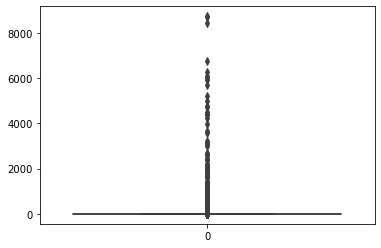

In [57]:
sns.boxplot(data=eventsperip)

This shows that there are some IP addresses associated with a very large numbers of events.

In [58]:
ipbyuseridcount = (events.groupby(['user_ipaddress','domain_userid'], as_index=False).count()
                   .groupby('user_ipaddress', as_index=False)['domain_userid'].count())

In [59]:
manyuserids = ipbyuseridcount.loc[ipbyuseridcount['domain_userid']>500]
manyuserids.shape

(31, 2)

In [60]:
manyuserids.head()

,user_ipaddress,domain_userid
24103,09Vr9KqO9KyBTtxDa3JLy2yOxCVkw/JjmNcmNcVaqQo=,555
52384,2gHxzsD6VUPcJRuRo0UC2A0dgz3bjREYyRE3LX41tkQ=,3628
61298,3TXgy8BPyPRK+pNMX6hDODBoSSIkhBKhMA/EwSuYQbE=,1206
77340,4w01ETGeNvxV86wdxbVdJurSSEaLabM6ul7MWG0mTvI=,908
110239,7qugTOwTAYX3OG63y5RYOEwwztCRy4hIK3LtRPWYy1A=,539


In [61]:
ips = events.loc[(events['user_ipaddress'].isin(manyuserids['user_ipaddress']))]
ips.shape

(66662, 29)

In [62]:
ips['user_ipaddress'].value_counts()

dgEJfPWYnwQze2jPZrI5wC0SyEFGcJCK0Ayko5lumfA=    6267
ObHO03PpnMhR1btoy/YqwbrWuwFsZuxmmJxU+mumZYI=    5703
etKgx5+jfXRHLJRfhpY60ROlpychnLNGZ8CbsKW1dVM=    4749
oPphCmbOAbhkxBbvrFu9i5ZgQ/mOAKZm29gBTwmEeIA=    4733
plp+bNUnKMqocBYjpG217CkI28ZvHkpmSUlA2n12elE=    4429
2gHxzsD6VUPcJRuRo0UC2A0dgz3bjREYyRE3LX41tkQ=    3645
3TXgy8BPyPRK+pNMX6hDODBoSSIkhBKhMA/EwSuYQbE=    3594
sXyMAHyWYBT5JN2trWYizJr/yfff7Lu3fDcZpksXyUM=    3223
9W5HiXpWdrf88/6SPZ76K3h2Q7KiY+qwsWIhYzmUJCU=    3153
TzIJy+pmaSyO+RPpPl6Pov6AnMBU7DM3d2OAV5hdey0=    2655
rQJAgRQE/lOzoP5Wkb3YgLvkQlMDOoKSJZo3HUJUwbQ=    2212
j5c6wW+57gxbL2tMP8OZeOcUw4oxuhwl9gTwg4Vd3Gc=    2071
7qugTOwTAYX3OG63y5RYOEwwztCRy4hIK3LtRPWYy1A=    2052
KO1UaiXSF6/275PLw2oRUN5gqZC9JjMqnGUn9SHuJUw=    1956
Miy2xeCX/MmCtpBJZJjr+n2+vZkL/SuVvrfp+CuxQmU=    1875
09Vr9KqO9KyBTtxDa3JLy2yOxCVkw/JjmNcmNcVaqQo=    1807
NFgfiODyerhk4o4Op7lcXs+LIZE3nvLftYnv0j8IZHE=    1631
uQ3KkmePjZ1P0n7JsmXryDi4g5LEE3imkvmyesMBICw=    1459
HBLRCk+3cOQ9Hk7L3KF5Sspvu2+e7FXOtHNcMkZreno=  

In [63]:
# This doesn't yet include normal subscribers and non-subscribers
ips['user_type'].value_counts()

Bot                                  25804
Non-Subscriber (non-expd Session)      992
Probable bot                           657
Subscriber (non-expd Session)          421
Name: user_type, dtype: int64

#### Look at Subscribers in this list

In [64]:
subsips = events.loc[(events['user_ipaddress'].isin(ips['user_ipaddress'])) & (events['member_type'] == 'Subscriber')]
subsips.shape

(9370, 29)

In [65]:
subsips['user_type'].value_counts()

Subscriber (non-expd Session)    421
Name: user_type, dtype: int64

In [66]:
# Look at these Subscriber IP address and their member ids
# Flag them if the IPs are associated with many different member_ids
# they could be a proxy server being connected to by multiple subscribers
subipmemidcount = (subsips.groupby(['user_ipaddress','member_id'], as_index=False).count()
                   .groupby('user_ipaddress', as_index=False)['member_id'].count())

In [67]:
subipmemidcount

,user_ipaddress,member_id
0,09Vr9KqO9KyBTtxDa3JLy2yOxCVkw/JjmNcmNcVaqQo=,63
1,3TXgy8BPyPRK+pNMX6hDODBoSSIkhBKhMA/EwSuYQbE=,162
2,7qugTOwTAYX3OG63y5RYOEwwztCRy4hIK3LtRPWYy1A=,48
3,HBLRCk+3cOQ9Hk7L3KF5Sspvu2+e7FXOtHNcMkZreno=,55
4,KO1UaiXSF6/275PLw2oRUN5gqZC9JjMqnGUn9SHuJUw=,136
5,Miy2xeCX/MmCtpBJZJjr+n2+vZkL/SuVvrfp+CuxQmU=,87
6,ObHO03PpnMhR1btoy/YqwbrWuwFsZuxmmJxU+mumZYI=,172
7,TzIJy+pmaSyO+RPpPl6Pov6AnMBU7DM3d2OAV5hdey0=,70
8,etKgx5+jfXRHLJRfhpY60ROlpychnLNGZ8CbsKW1dVM=,166
9,j5c6wW+57gxbL2tMP8OZeOcUw4oxuhwl9gTwg4Vd3Gc=,67


As subscribers will sometimes go onto the site without logging in, their IP address can also be associated with the non-subscriber 'member_id' 0AAQhPrQmHuvKC08RFgkT68fGVirRQfhzeaoZL6FS6Y=

It won't be very common that different subscribers log in onto the same machine, but is possible. Also there can be multiple users on the same IP as devices can share an IP address e.g. via their home wifi router.

Take a look at one of the IP addresses. 

In [70]:
ipmanymembers = events.loc[(events['user_ipaddress'] == '3TXgy8BPyPRK+pNMX6hDODBoSSIkhBKhMA/EwSuYQbE=') & (events['member_type'] == 'Subscriber')]
ipmanymembers.shape

(808, 29)

In [71]:
ipmanymembers['member_id'].value_counts()

AshfDS3cgIu7WPS3KgT2UvRxg3TNgZb8Ebet4alKiQw=    40
Ynu4Th2UdcWHyzp4S/o9rq/UpNBbqgcENbg5HqfsS8k=    31
i5BWxdmsnZYSJzFUA1Xr3baKaw+B+h1zPZIYE3o2y4A=    25
BKfEpXPmdv1TNYTM6JTwqYE0hSpC2QqGaUTDXTZIVFI=    25
ZBQGKZksgC5jNVFeRgwyHjfh/JObK0Nlp7etuGe2pEY=    22
                                                ..
RlXXHgzbVPQkfYnaqsM5CyUDZTRb31Fw+V7C9qBZX8s=     1
5v06xdi0llf7/F9vlt7TyHOckONG722x2WvBc+GycEs=     1
MmNhYpMtNNJkwT1z9+fW6wMYl4/11hPGxVpzzI7mr8w=     1
C2PM8G68qvVkoB9Tw5uQeBwg1WYjG4Hft0pHh/fqqUs=     1
CxfrKSesCTa55ZzLvYd0In7lf0RtLb74LEqe/S0N/Iw=     1
Name: member_id, Length: 162, dtype: int64

If I assume that IP addresses with over 500 events in these 3 days are likely proxies, flag these.

In [72]:
events.loc[(events['user_ipaddress'].isin(subsips['user_ipaddress'])) 
           & (events['member_type'] == 'Subscriber') 
           & (events['user_type'] != 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)') 
           & (events['user_type'] != 'Bot') 
           & (events['user_type'] != 'Probable bot')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session)'), 'user_type'] = 'Subscriber (proxy)'
events['user_type'].value_counts()

Bot                                  146306
Non-Subscriber (non-expd Session)     46170
Subscriber (non-expd Session)         27337
Probable bot                          19178
Subscriber (proxy)                     8949
Probable bot (Subscriber)               966
Name: user_type, dtype: int64

In [73]:
events.loc[(events['user_ipaddress'].isin(subsips['user_ipaddress'])) 
           & (events['member_type'] == 'Subscriber') 
           & (events['user_type'] == 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)') 
           & (events['user_type'] != 'Bot') 
           & (events['user_type'] != 'Probable bot')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session)')
           & (events['user_type'] != 'Subscriber (proxy)'), 'user_type'] = 'Subscriber (non-expd Session/proxy)'
events['user_type'].value_counts()

Bot                                    146306
Non-Subscriber (non-expd Session)       46170
Subscriber (non-expd Session)           26916
Probable bot                            19178
Subscriber (proxy)                       8949
Probable bot (Subscriber)                 966
Subscriber (non-expd Session/proxy)       421
Name: user_type, dtype: int64

Set subscribers not already identified as having an issue to user_type: Subscriber (normal)

In [74]:
events.loc[(events['member_type'] == 'Subscriber') & (events['user_type'].isnull()), 'user_type'] = 'Subscriber (normal)'
events['user_type'].value_counts()

Subscriber (normal)                    1003257
Bot                                     146306
Non-Subscriber (non-expd Session)        46170
Subscriber (non-expd Session)            26916
Probable bot                             19178
Subscriber (proxy)                        8949
Probable bot (Subscriber)                  966
Subscriber (non-expd Session/proxy)        421
Name: user_type, dtype: int64

#### Now look at Non-Subscribers to identify possible proxies 

I check how many cookies a normal subscriber has to help work out a threshold for classifying non-subscriber IPs as being likely proxies.

In [75]:
normalsubs = events.loc[events['user_type'] == 'Subscriber (normal)']

In [76]:
subsbyip = (normalsubs.groupby(['user_ipaddress','domain_userid'], as_index=False).count()
                   .groupby('user_ipaddress', as_index=False)['domain_userid'].count())
subsbyip.describe()

,domain_userid
count,118048.000000
mean,1.661112
std,2.364621
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,147.000000


Users (especially non-subscribers) could be using private/incognito browsing and therefore creating many more cookie and session ids.

For now I will flag the ones identified above as having > 500 cookies

In [77]:
# Find non-subscribers that have IP addresses with over 500 events
nonsubs = events.loc[(events['user_ipaddress'].isin(ips['user_ipaddress'])) & (events['member_type']=='Non-Subscriber')]
nonsubs.shape

(57292, 29)

In [78]:
nonsubs['user_type'].value_counts()

Bot                                  25804
Non-Subscriber (non-expd Session)      992
Probable bot                           657
Name: user_type, dtype: int64

In [79]:
events.loc[(events['user_ipaddress'].isin(nonsubs['user_ipaddress'])) 
           & (events['member_type'] == 'Non-Subscriber') 
           & (events['user_type'] != 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)')
           & (events['user_type'] != 'Subscriber (normal)')
           & (events['user_type'] != 'Subscriber (non-expd Session/proxy)')
           & (events['user_type'] != 'Bot')
           & (events['user_type'] != 'Subscriber (proxy)')
           & (events['user_type'] != 'Probable bot')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session)'), 'user_type'] = 'Non-Subscriber (proxy)'
events['user_type'].value_counts()

Subscriber (normal)                    1003257
Bot                                     146306
Non-Subscriber (non-expd Session)        46170
Non-Subscriber (proxy)                   29839
Subscriber (non-expd Session)            26916
Probable bot                             19178
Subscriber (proxy)                        8949
Probable bot (Subscriber)                  966
Subscriber (non-expd Session/proxy)        421
Name: user_type, dtype: int64

In [80]:
events.loc[(events['user_ipaddress'].isin(nonsubs['user_ipaddress'])) 
           & (events['member_type'] == 'Non-Subscriber')
           & (events['user_type'] == 'Bot')
           & (events['user_type'] != 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)')
           & (events['user_type'] != 'Subscriber (normal)')
           & (events['user_type'] != 'Subscriber (non-expd Session/proxy)')
           & (events['user_type'] != 'Non-Subscriber (proxy)')
           & (events['user_type'] != 'Subscriber (proxy)')
           & (events['user_type'] != 'Probable bot')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session)'), 'user_type'] = 'Bot (proxy)'
events['user_type'].value_counts()

Subscriber (normal)                    1003257
Bot                                     120502
Non-Subscriber (non-expd Session)        46170
Non-Subscriber (proxy)                   29839
Subscriber (non-expd Session)            26916
Bot (proxy)                              25804
Probable bot                             19178
Subscriber (proxy)                        8949
Probable bot (Subscriber)                  966
Subscriber (non-expd Session/proxy)        421
Name: user_type, dtype: int64

In [81]:
events.loc[(events['user_ipaddress'].isin(nonsubs['user_ipaddress'])) 
           & (events['member_type'] == 'Non-Subscriber')
           & (events['user_type'] == 'Non-Subscriber (non-expd Session)')
           & (events['user_type'] != 'Bot')
           & (events['user_type'] != 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)')
           & (events['user_type'] != 'Subscriber (normal)')
           & (events['user_type'] != 'Subscriber (non-expd Session/proxy)')
           & (events['user_type'] != 'Non-Subscriber (proxy)')
           & (events['user_type'] != 'Subscriber (proxy)')
           & (events['user_type'] != 'Probable bot')
           & (events['user_type'] != 'Bot (proxy)'), 'user_type'] = 'Non-Subscriber (non-expd Session/proxy)'
events['user_type'].value_counts()

Subscriber (normal)                        1003257
Bot                                         120502
Non-Subscriber (non-expd Session)            45178
Non-Subscriber (proxy)                       29839
Subscriber (non-expd Session)                26916
Bot (proxy)                                  25804
Probable bot                                 19178
Subscriber (proxy)                            8949
Non-Subscriber (non-expd Session/proxy)        992
Probable bot (Subscriber)                      966
Subscriber (non-expd Session/proxy)            421
Name: user_type, dtype: int64

In [82]:
events.loc[(events['user_ipaddress'].isin(nonsubs['user_ipaddress'])) 
           & (events['member_type'] == 'Non-Subscriber')
           & (events['user_type'] == 'Probable bot')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session)')
           & (events['user_type'] != 'Bot')
           & (events['user_type'] != 'Subscriber (non-expd Session)') 
           & (events['user_type'] != 'Probable bot (Subscriber)')
           & (events['user_type'] != 'Subscriber (normal)')
           & (events['user_type'] != 'Subscriber (non-expd Session/proxy)')
           & (events['user_type'] != 'Non-Subscriber (proxy)')
           & (events['user_type'] != 'Subscriber (proxy)')
           & (events['user_type'] != 'Non-Subscriber (non-expd Session/proxy)')
           & (events['user_type'] != 'Bot (proxy)'), 'user_type'] = 'Non-Subscriber (non-expd Session/proxy)'
events['user_type'].value_counts()

Subscriber (normal)                        1003257
Bot                                         120502
Non-Subscriber (non-expd Session)            45178
Non-Subscriber (proxy)                       29839
Subscriber (non-expd Session)                26916
Bot (proxy)                                  25804
Probable bot                                 18521
Subscriber (proxy)                            8949
Non-Subscriber (non-expd Session/proxy)       1649
Probable bot (Subscriber)                      966
Subscriber (non-expd Session/proxy)            421
Name: user_type, dtype: int64

### Explore further unusual behaviour

As I have been looking through the data I saw that some users have many events very close together (within milliseconds). These could indicate further unusual e.g. bot activity, or could be caused by an error. It would be useful to further investigate this and filter events that are too close together to be actual user page reads.

#### Take a look at duplicate page_view_ids

Are the duplicates mostly caused by bots? Page_view_ids can be null or duplicated due to an error or due to a bot.

In [83]:
events['page_view_id'].isnull().sum()

1520

In [84]:
# find page_view_id duplicates
duppageviewid = events.loc[events['page_view_id'].duplicated()]
duppageviewid.shape

(143822, 29)

In [85]:
duppageviewid['user_type'].value_counts()

Bot                                        108027
Subscriber (normal)                          4850
Probable bot                                 1671
Non-Subscriber (non-expd Session)            1462
Probable bot (Subscriber)                     739
Subscriber (non-expd Session)                 402
Non-Subscriber (proxy)                        319
Subscriber (proxy)                             39
Bot (proxy)                                    21
Subscriber (non-expd Session/proxy)             3
Non-Subscriber (non-expd Session/proxy)         2
Name: user_type, dtype: int64

Most of the duplicate page view ids are from bots

What about the rest?

In [86]:
notclassifiedusers = events.loc[events['user_type'].isnull()]
notclassifiedusers.shape

(2377145, 29)

In [87]:
# find page_view_id duplicates in not classified users
duppageviewidrest = notclassifiedusers.loc[notclassifiedusers['page_view_id'].duplicated()]
duppageviewidrest.shape

(25455, 29)

It would be good to investigate this further. Take a look at the domain_userids, domain_sessionids and event timestamps for these events. For instance, are there similar/duplicate timestamps that may account for a client browser or pipeline error? 

Or do these users display other bot-like behaviour? As I've been looking through the data I saw that some users have many events very close together (within milliseconds). These could indicate further unusual e.g. bot activity, or could be caused by an error. It would be useful to further investigate this and filter events that are too close together to be actual user page reads.

#### Events where page_view_id is null

In [88]:
nullpageview = events[events["page_view_id"].isnull()]
nullpageview.shape

(1520, 29)

In [89]:
nullpageview['article_type'].value_counts()

SUBSCRIPTION    789
INDEX           712
SOUNDSLIDE        5
ARTICLE           5
PHOTOGALLERY      1
Name: article_type, dtype: int64

In [90]:
nullpageview['member_type'].value_counts()

Non-Subscriber    1520
Name: member_type, dtype: int64

In [91]:
nullpageview['page_urlhost'].value_counts()

subscribers.smh.com.au               1380
weather.smh.com.au                    119
www.smh.com.au                         17
www.smh.com.au.images.smh.com.au        2
smh.myfairfax.com.au                    1
xrys.smh.com.au.images.smh.com.au       1
Name: page_urlhost, dtype: int64

Interesting that most are from subscribers.smh.com.au but are Non-subscribers. Subscriber Hub currently not available.

Many are from /support-centre or /local-forecast/ urls.

#### Also take a look at Unknown OSs

In [92]:
osunknownsubs = notclassifiedusers.loc[notclassifiedusers['os_name'] == 'Unknown']
osunknownsubs.shape

(3288, 29)

In [93]:
osfamunknownsubs = notclassifiedusers.loc[notclassifiedusers['os_family'] == 'Unknown']
osfamunknownsubs.shape

(3288, 29)

Looking at the useragents for these, most of them include FBAN/ FBAV and are from facebook mobile app. There are also useragents for FreeBSD (unix like OS) and one for OS/2 Warp

In [94]:
otheruseragents = osfamunknownsubs.loc[~osfamunknownsubs['useragent'].str.contains("FBAN|FBAV")]
otheruseragents.shape

(58, 29)

In [95]:
otheruseragents['useragent'].value_counts()

Mozilla/5.0 (compatible; Konqueror/4.5; NetBSD 5.0.2; X11; amd64; en_US) KHTML/4.5.4 (like Gecko)                                    9
Mozilla/5.0 (en-US) AppleWebKit/537.36 (KHTML, like Gecko; Widget Server) Chrome/84.0.4147.140 Safari/537.36                         7
Mozilla/5.0 (OS/2; Warp 4.5; rv:45.0) Gecko/20100101 Firefox/45.0                                                                    7
Opera/9.80 (X11; FreeBSD 8.1-RELEASE i386; Edition Next) Presto/2.12.388 Version/12.10                                               6
Mozilla/5.0 (X11; FreeBSD amd64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.153 Safari/537.36                           4
Mozilla/5.0 (X11; FreeBSD amd64) AppleWebKit/537.4 (KHTML like Gecko) Chrome/22.0.1229.79 Safari/537.4                               3
Mozilla/5.0 (X11; OpenBSD amd64; rv:30.0) Gecko/20100101 Firefox/30.0                                                                3
Mozilla/5.0 (compatible; Konqueror/4.1; OpenBSD) KHTML/

Set user type for the remainder of the non-subscribers to: Non-Subscriber (normal)

In [96]:
events.loc[(events['user_type'].isnull()), 'user_type'] = 'Non-Subscriber (normal)'
events['user_type'].value_counts()

Non-Subscriber (normal)                    2377145
Subscriber (normal)                        1003257
Bot                                         120502
Non-Subscriber (non-expd Session)            45178
Non-Subscriber (proxy)                       29839
Subscriber (non-expd Session)                26916
Bot (proxy)                                  25804
Probable bot                                 18521
Subscriber (proxy)                            8949
Non-Subscriber (non-expd Session/proxy)       1649
Probable bot (Subscriber)                      966
Subscriber (non-expd Session/proxy)            421
Name: user_type, dtype: int64

Set user type for the remainder of the subscribers to: Subscriber (normal)